In [9]:
import pandas as pd

data = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [10]:
data_melt = pd.melt(data.reset_index(), id_vars = ['index'], value_vars = ['A', 'B', 'C', 'D'])
data_melt.columns = ['blocks', 'treatments', 'values']
data_melt

,blocks,treatments,values
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [17]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('values ~ C(blocks) + C(treatments)', data = data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ = 1)
anova_table



,df,sum_sq,mean_sq,F,PR(>F)
C(blocks),4.0,366.70,91.675000,1.995465,0.159343
C(treatments),3.0,3010.95,1003.650000,21.846182,0.000038
Residual,12.0,551.30,45.941667,NaN,NaN


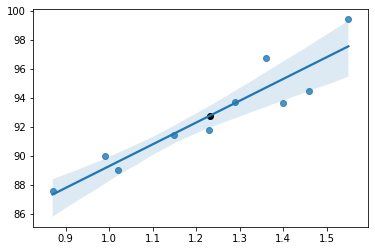

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x = [0.99,1.02,1.15,1.29,1.36,1.46,0.87,1.23,1.55,1.4]
y = [90.01,89.05,91.43,93.74,96.73,94.45,87.59,91.77,99.42,93.65]

# Drawing regression plot
sns.regplot(x, y, fit_reg = True)

# Drawing scatter plot
plt.scatter(np.mean(x), np.mean(y), color = 'black')


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

x = [1,3,2,1,3]
y = [14,24,18,17,27]

